# Importamos las librerías y el DataFrame

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/kaggle/input/league-of-legends-diamond-ranked-games-10-min/high_diamond_ranked_10min.csv')

In [2]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [4]:
df_clean = df.copy()

# Eliminamos las columnas que no nos sirvan
Por ejemplo, que tengan poca relación o que esa relación no aporte nada que no sepamos con otros atributos.
Pero primero de todo es quitar el gameId y quitar todas las variables que tengan que ver con el equipo rojo y algunas otras.

(no se muy bien por qué ha dejado algunas del equipo rojo aquí)

In [5]:
#Drop some unecessary columns. e.g. blueFirstblood/redfirst blood blueEliteMonster/redEliteMonster blueDeath/redKills etc are repeated
# Based on personal experience with the game, mimion yield gold+experience, we can drop minion kill too

cols = ['gameId', 'redFirstBlood', 'redKills', 'redEliteMonsters', 'redDragons','redTotalMinionsKilled','redTotalJungleMinionsKilled', 
        'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin', 'redHeralds','blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 
        'blueGoldPerMin', 'blueTotalMinionsKilled']
#print(cols)
df_clean = df_clean.drop(labels='gameId', axis = 1)
df_clean = df_clean.drop(labels='redFirstBlood', axis = 1)
df_clean = df_clean.drop(labels='redKills', axis = 1)
df_clean = df_clean.drop(labels='redEliteMonsters', axis = 1)
df_clean = df_clean.drop(labels='redDragons', axis = 1)
df_clean = df_clean.drop(labels='redTotalMinionsKilled', axis = 1)
df_clean = df_clean.drop(labels='redTotalJungleMinionsKilled', axis = 1)
df_clean = df_clean.drop(labels='redGoldDiff', axis = 1)
df_clean = df_clean.drop(labels='redExperienceDiff', axis = 1)
df_clean = df_clean.drop(labels='redCSPerMin', axis = 1)
df_clean = df_clean.drop(labels='redGoldPerMin', axis = 1)
df_clean = df_clean.drop(labels='redHeralds', axis = 1)
df_clean = df_clean.drop(labels='blueGoldDiff', axis = 1)
df_clean = df_clean.drop(labels='blueExperienceDiff', axis = 1)
df_clean = df_clean.drop(labels='blueCSPerMin', axis = 1)
df_clean = df_clean.drop(labels='blueGoldPerMin', axis = 1)
df_clean = df_clean.drop(labels='blueTotalMinionsKilled', axis = 1)



El resultado es la siguiente foto:

In [6]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

Ahora nos fijamos en la matriz de correlación y quitamos las que no estén muy correlacionadas.

In [7]:
# Based on the correlation matrix, let's clean the dataset a little bit more to avoid colinearity
cols = ['blueAvgLevel', 'redWardsPlaced', 'redWardsDestroyed', 'redDeaths', 'redAssists', 'redTowersDestroyed',
       'redTotalExperience', 'redTotalGold', 'redAvgLevel']
df_clean = df_clean.drop(cols, axis=1)

In [8]:
# Next let's drop the columns has little correlation with bluewins
corr_list = df_clean[df_clean.columns[1:]].apply(lambda x: x.corr(df_clean['blueWins']))
cols = []
for col in corr_list.index:
    if (corr_list[col]>0.23 or corr_list[col]<-0.23):
        cols.append(col)
cols

['blueKills',
 'blueDeaths',
 'blueAssists',
 'blueTotalGold',
 'blueTotalExperience']

In [9]:
df_clean = df_clean[cols]
df_clean.head()

,blueKills,blueDeaths,blueAssists,blueTotalGold,blueTotalExperience
0,9,6,11,17210,17039
1,5,5,5,14712,16265
2,7,11,4,16113,16221
3,4,5,5,15157,17954
4,6,6,6,16400,18543


# Normalizamos y dividimos entre el conjunto de entrenamiento y el conjunto de pruebas

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from prettytable import PrettyTable

# Creamos la tabla que nos permitirá mostrar las métricas obtenidas.
metricas = PrettyTable()
metricas.field_names = ['Clasificador', 'Exactitud', 'Recall', 'Precisión']

# Guardaremos los resultados en un vector para ser mostrados en la conclusión del trabajo.
resultados = []

X= df_clean

# Normalizamos los datos
X = StandardScaler().fit(X).transform(X)

# Asignamos los valores de entrenamiento y prueba
y = df['blueWins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 28)

25% para el conjunto de pruebas

In [11]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (7409, 5) (7409,)
Test set: (2470, 5) (2470,)


# MODEL SELECTION

> "Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference Wikipedia.
> 
> Note the confidence score generated by the model based on our training dataset."

# Métrica para nuestros resultados
- Accuracy (Exactitud): Es el porcentaje total de elementos clasificados correctamente. Es la medida más directa de la calidad de los clasificadores. Es un valor entre 0 y 1. Cuanto más alto, mejor.

- Recall (Tasa de True Positive): Es el número de elementos identificados correctamente como positivos del total de positivos verdaderos.

- Precision: Es el número de elementos identificados correctamente como positivo de un total de elementos identificados como positivos.

- Confusion Matrix (Matriz de Confusión): Es una tabla que describe el rendimiento de un modelo supervisado de Machine Learning en los datos de prueba, donde se desconocen los verdaderos valores.


### GridSearchCV

Es una clase disponible en scikit-learn que permite evaluar y seleccionar de forma sistemática los parámetros de un modelo. Indicándole un modelo y los parámetros a probar, puede evaluar el rendimiento del primero en función de los segundos mediante validación cruzada.

### Validación Cruzada
Al hacer uso de esta tecnica, el conjunto de datos de entrenamiento se divide en grupos de igual tamaño. Una vez realizada la partición se procede a entrenar el modelo una vez por cada uno de los grupos. Utilizando todos los grupos menos el de la iteración para entrenar y este para validar los resultados. Como se aprecia en al siguiente imagen:

In [12]:
# Importamos la clase de scikit-learn
from sklearn.model_selection import GridSearchCV

# Creamos la tabla que nos permitirá mostrar las métricas obtenidas.
metricas_grid_search = PrettyTable()
metricas_grid_search.field_names = ['Clasificador', 'Exactitud', 'Recall', 'Precisión']

# Guardaremos los resultados en un vector para ser mostrados en la conclusión del trabajo.
resultados_grid_search = []

Regresión Logística

In [13]:
from sklearn.linear_model import LogisticRegression

# Colocamos los valores de parámetros que queremos que GridSearchCV pruebe por nosotros
grid_values = {'penalty': ['l1', 'l2'],
               'C':[.001,.009,0.01,.09,1,2,3,4,5,7,10,25],
               'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'fit_intercept' : [True, False]}

# Instanciamos la clase con los parámetros previamente asignados
grid_clf_acc = GridSearchCV(LogisticRegression(), param_grid = grid_values, scoring = 'accuracy', verbose=False, n_jobs=-1)

# Seleccionamos la tabla entera, ya que el método se encargará de realizar la técnica de Cross-Validation
grid_clf_acc.fit(X, y)

# Imprimimos los mejores parámetros seleccionados por GridSearchCV
print("Parámetros elegidos: " + str(grid_clf_acc.best_params_) + "\n")

# Predecimos los valores
y_pred_acc = grid_clf_acc.predict(X)

# Métricas de evaluación
exactitud = accuracy_score(y,y_pred_acc)
recall = recall_score(y,y_pred_acc)
precision = precision_score(y,y_pred_acc)
LR_confusion_matrix = confusion_matrix(y,y_pred_acc)

# Anexamos los resultados para ser mostrados posteriormente
resultados_grid_search.append(exactitud)

# Formateamos los datos para mostrarlos como % en la tabla.
exactitud = str(round(exactitud * 100, 2)) + " %"
recall = str(round(recall * 100, 2)) + " %"
precision = str(round(precision * 100, 2)) + " %"

metricas_grid_search.add_row(['Regresión Logística', exactitud, recall, precision])

Parámetros elegidos: {'C': 0.01, 'fit_intercept': False, 'penalty': 'l1', 'solver': 'liblinear'}




K-Nearest Neighbours

In [14]:
from sklearn.neighbors import KNeighborsClassifier


# Colocamos los valores de parámetros que queremos que GridSearchCV pruebe por nosotros
grid_values = {"n_neighbors": [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 22, 25, 30, 86, 87, 88, 100],
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

# Instanciamos la clase con los parámetros previamente asignados
grid_clf_acc = GridSearchCV(KNeighborsClassifier(), param_grid = grid_values, scoring = 'accuracy', verbose=False, n_jobs=-1)

# Seleccionamos la tabla entera, ya que el método se encargará de realizar la técnica de Cross-Validation
grid_clf_acc.fit(X, y)

# Imprimimos los mejores parámetros seleccionados por GridSearchCV
print("Parámetros elegidos: " + str(grid_clf_acc.best_params_) + "\n")

# Predecimos los valores
y_pred_acc = grid_clf_acc.predict(X)

# Métricas de evaluación
exactitud = accuracy_score(y,y_pred_acc)
recall = recall_score(y,y_pred_acc)
precision = precision_score(y,y_pred_acc)
KNN_confusion_matrix = confusion_matrix(y,y_pred_acc)

# Anexamos los resultados para ser mostrados posteriormente
resultados_grid_search.append(exactitud)

# Formateamos los datos para mostrarlos como % en la tabla.
exactitud = str(round(exactitud * 100, 2)) + " %"
recall = str(round(recall * 100, 2)) + " %"
precision = str(round(precision * 100, 2)) + " %"

metricas_grid_search.add_row(['K-Nearest Neighbours', exactitud, recall, precision])

Parámetros elegidos: {'metric': 'euclidean', 'n_neighbors': 86, 'weights': 'uniform'}



Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier


# Colocamos los valores de parámetros que queremos que GridSearchCV pruebe por nosotros
grid_values = {'max_depth': np.arange(1, 21),
               'min_samples_leaf': [1, 5, 10, 20, 50, 100]}

# Instanciamos la clase con los parámetros previamente asignados
grid_clf_acc = GridSearchCV(DecisionTreeClassifier(), param_grid = grid_values, scoring = 'accuracy', verbose=False, n_jobs=-1)

# Seleccionamos la tabla entera, ya que el método se encargará de realizar la técnica de Cross-Validation
grid_clf_acc.fit(X, y)

# Imprimimos los mejores parámetros seleccionados por GridSearchCV
print("Parámetros elegidos: " + str(grid_clf_acc.best_params_) + "\n")

# Predecimos los valores
y_pred_acc = grid_clf_acc.predict(X)

# Métricas de evaluación
exactitud = accuracy_score(y,y_pred_acc)
recall = recall_score(y,y_pred_acc)
precision = precision_score(y,y_pred_acc)
DT_confusion_matrix = confusion_matrix(y,y_pred_acc)

# Anexamos los resultados para ser mostrados posteriormente
resultados_grid_search.append(exactitud)

# Formateamos los datos para mostrarlos como % en la tabla.
exactitud = str(round(exactitud * 100, 2)) + " %"
recall = str(round(recall * 100, 2)) + " %"
precision = str(round(precision * 100, 2)) + " %"

metricas_grid_search.add_row(['Decision Tree', exactitud, recall, precision])



Parámetros elegidos: {'max_depth': 5, 'min_samples_leaf': 100}



### Métricas

In [16]:
print("Clasificadores con GridSearchCV (Ordenados por Exactitud)")
metricas_grid_search.sortby = "Exactitud"
metricas_grid_search.reversesort = True
print(metricas_grid_search)

Clasificadores con GridSearchCV (Ordenados por Exactitud)
+----------------------+-----------+---------+-----------+
|     Clasificador     | Exactitud |  Recall | Precisión |
+----------------------+-----------+---------+-----------+
| K-Nearest Neighbours |   72.2 %  | 70.37 % |  72.97 %  |
|    Decision Tree     |   72.1 %  |  71.5 % |  72.29 %  |
| Regresión Logística  |  72.09 %  | 72.09 % |  72.02 %  |
+----------------------+-----------+---------+-----------+



### Matrices de Confusión

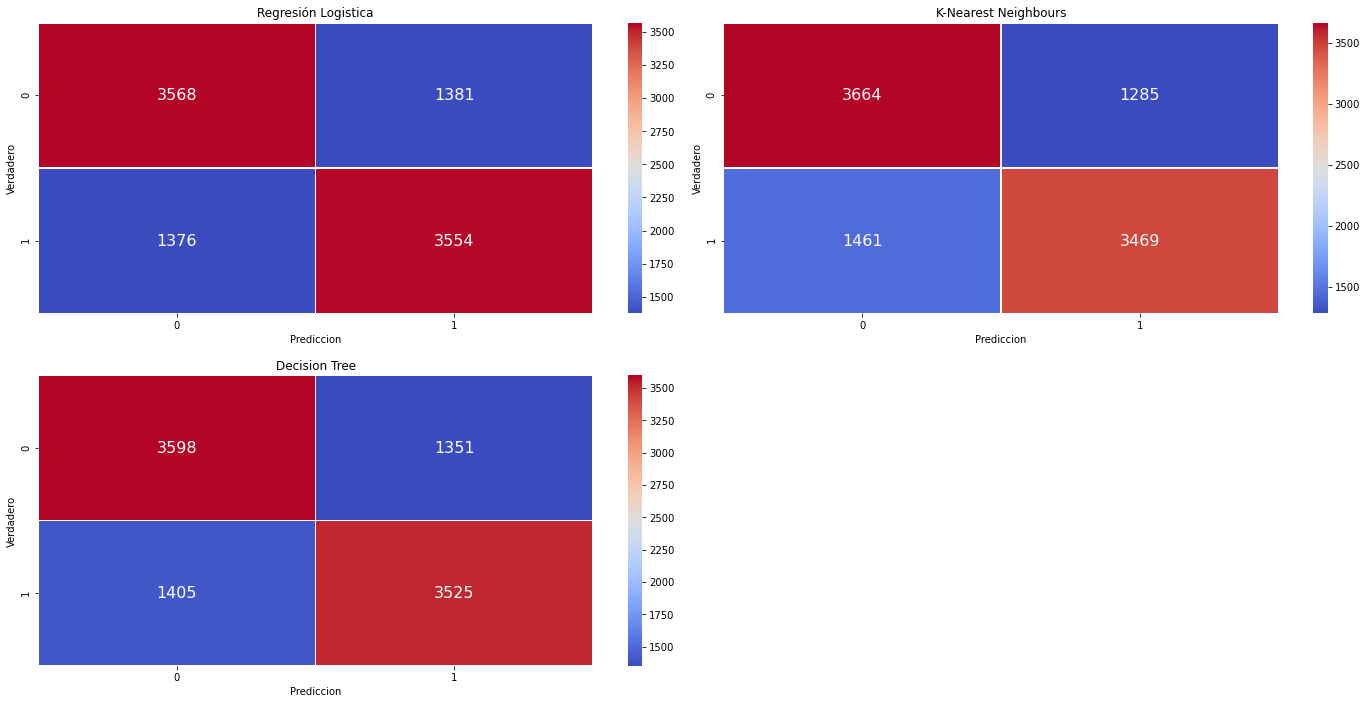

In [17]:
import seaborn as sns

plt.figure(figsize=(20,10))

plt.subplot(221)
sns.heatmap(LR_confusion_matrix, cmap="coolwarm", fmt=".0f",annot=True, linewidths=.5, annot_kws={"size": 16})
plt.xlabel("Prediccion")
plt.ylabel("Verdadero")
plt.title('Regresión Logistica')
plt.tight_layout(pad=1.5)

plt.subplot(222)
sns.heatmap(KNN_confusion_matrix, cmap="coolwarm", fmt=".0f",annot=True, linewidths=.5, annot_kws={"size": 16})
plt.xlabel("Prediccion")
plt.ylabel("Verdadero")
plt.title('K-Nearest Neighbours')
plt.tight_layout(pad=1.5)

plt.subplot(223)
sns.heatmap(DT_confusion_matrix, cmap="coolwarm", fmt=".0f",annot=True, linewidths=.5, annot_kws={"size": 16})
plt.xlabel("Prediccion")
plt.ylabel("Verdadero")
plt.title('Decision Tree')
plt.tight_layout(pad=1.5)

plt.show()

Conclusión

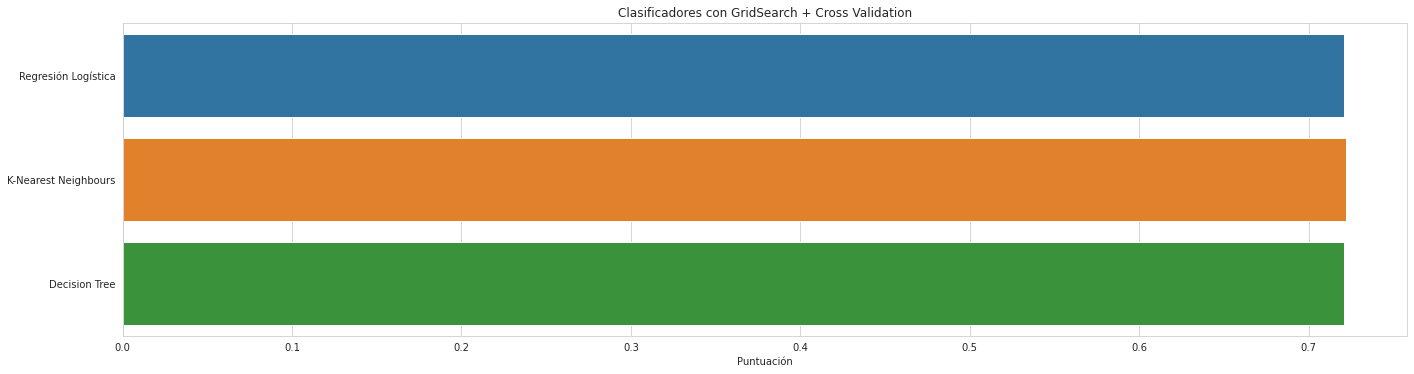

In [18]:
plt.figure(figsize=(20,15))
sns.set_style("whitegrid")

modelos = ["Regresión Logística", "K-Nearest Neighbours", "Decision Tree"]
grafico_resultados_grid_search = pd.DataFrame({"Puntuación": resultados_grid_search, "Modelos": modelos})

plt.subplot(312)
sns.barplot("Puntuación", "Modelos", data = grafico_resultados_grid_search)
plt.ylabel("")
plt.title('Clasificadores con GridSearch + Cross Validation')
plt.tight_layout(pad=2)

# ¿Qué te parece?